# Tutorial 01: Hello, World!

**Description:** In this tutorial, we explore the fundamentals of computational imaging using Blender. The goal is to build a synthetic image pipeline that mimics the components of a physical imaging system. We focus on three core elements: the camera, the lights, and the scene itself. By the end, you will have a deeper understanding of how to control these elements programmatically to simulate a simple imaging setup.

**Requirement(s):** blender_notebook numpy matplotlib

**Author:** Matthew O'Toole

---

#### Part 0: Creating the Blender kernel

Before getting into the actual content of this notebook, our first step is to wrap Blender into a Jupyter notebook kernel.

If you have not installed Blender already, head on over to the Blender website (https://www.blender.org/), download the latest version, and install the application.  Blender embeds its own Python interpreter, which we will use to wrap Blender as a Jupyter notebook kernel.

Open a terminal and navigate to the directory containing the Python executable.  For example, on a macOS for *Blender 4.5*, this is done as follows:
>cd /Applications/Blender.app/Contents/Resources/4.5/python/bin

Next, we will use pip to install or upgrade the Python packages listed above and required by this notebook.  For *Blender 4.5*, this is done using the following
notebook, this includes the following:
>./python3.11 -m pip install --upgrade blender_notebook numpy matplotlib

(You may need to adjust this line to reflect the version of Python provided by Blender.) Finally, to create the actual kernel, we use the following line:
>./blender_notebook install --blender-exec='/Applications/Blender.app/Contents/MacOS/Blender'

And that's it!  When using Jupyter notebook (e.g., via Visual Studio Code), a 'blender' kernel should now be available, which launches an instance of Blender and allows it to be controlled programmatically.

#### Part 1: Initialize the scene

Before defining the camera, lights, or scene objects, it’s good practice to clear the Blender scene. This ensures that your setup is reproducible and free of unintended leftover objects from previous sessions.  We will also import the relevant Python modules used by this notebook.

In [ ]:
import bpy
import numpy as np
import matplotlib.pyplot as plt

# Clear scene
if __name__ == '__main__':
    bpy.ops.wm.read_factory_settings(use_empty=True)

register_class(...):
Info: Registering key-config preferences class: 'Prefs', bl_idname 'Blender' has been registered before, unregistering previous


#### Part 2: Defining the camera

The camera is the gateway between the virtual world and the image we render. In computational imaging, we often need precise control over the camera's parameters, including focal length, sensor size, and aperture (to name a few).  Here, we create a simple perspective camera.

In [2]:
# Create camera
def define_camera():
    bpy.ops.object.camera_add(rotation=(np.pi/2, 0, 0))
    cam = bpy.context.active_object
    bpy.context.scene.camera = cam

#### Part 3: Defining the lights

Lighting plays a critical role in how a scene is perceived. Computational imaging often requires carefully controlled illumination to simulate specific lighting conditions or extract scene properties.  Here, we add the humble point light source, colocated with the position of the camera, to provide a source of illumination.

In [3]:
# Add light source
def define_light():
    bpy.ops.object.light_add(type='POINT')
    light = bpy.context.active_object
    light.data.energy = 1e4

#### Part 4: Defining the scene

The scene includes the geometry, materials, and background environment. In the following tutorials, scenes often consist of a single object, used to emphasize certain aspects like shape and reflectance (e.g., a Lambertian sphere). For now, we add a simple object to the scene.

In [4]:
# Add text to scene
def define_scene():
    bpy.ops.object.text_add(location=(0, 10, 0), rotation=(np.pi/2, 0, 0))
    text = bpy.context.active_object
    text.data.body = "Hello, World!"
    text.data.size = 1
    text.data.align_x = 'CENTER'
    text.data.align_y = 'CENTER'

#### Part 5: Render an image

With the camera, lights, and scene defined, the final step in the imaging pipeline is to render the image. Rendering simulates how light interacts with the scene from the camera's perspective and generates a 2D image that can be saved and analyzed.

Saved: 'tmp/output.PNG'
Time: 00:00.97 (Saving: 00:00.14)



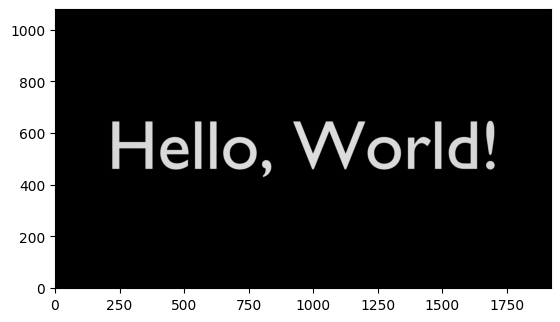

In [5]:
def get_render():
    # Set render path with the appropriate extension
    path = './tmp/output.' + bpy.context.scene.render.image_settings.file_format
    bpy.context.scene.render.filepath = path

    # Render the scene
    bpy.ops.render.render(write_still=True)

    # Read in the image
    image = bpy.data.images.load(path)
    image.colorspace_settings.name = 'Non-Color'
    width, height = image.size
    pixels = np.array(image.pixels)
    pixels = pixels.reshape((height, width, 4))
    pixels = pixels[:,:,0:3]

    return pixels

if __name__ == '__main__':
    define_camera()
    define_light()
    define_scene()

    bpy.context.scene.render.image_settings.file_format = 'PNG'
    plt.imshow(get_render(), origin='lower')

#### Exercise 1: Experiment with cameras, lights, and objects

To help understand Blender's Python API, check out the following resources:

* **Blender Python API Dcoumentation (https://docs.blender.org/api/current/index.html):** Perhaps the first resource is the official Blender documentation , which includes (i) a quickstart guide to familiarize yourself with the Blender Python API, (ii) best practices for Blender python development and (iii) a description of all Blender Python modules.

* **Blender's Info Editor (https://docs.blender.org/manual/en/latest/editors/info_editor.html):** Already familiar with how to use Blender?  Most operations performed within Blender appears as a Python function call in the *Info Editor*.  After performing an operation manually (e.g., adding a cube to the scene), the code to replicate this action appears within the editor; simply copy and paste the line to perform this action programmatically.

* **CGPython (https://github.com/CGArtPython/, https://www.youtube.com/@CGPython):** There are many Blender tutorials available online and CGPython is among the best (in my opinion) in terms of learning to use Python for Blender.

* **The magic of LLMs:** Existing LLMs (e.g., ChatGPT) are already proficient at generating Blender Python code.  Give it a try!

Try modifying this notebook to (i) reposition the camera, (ii) adjust the color of the light source, or (iii) add a new object to the scene.